<a href="https://colab.research.google.com/github/brodyandre/imigracao_americalatina_canada/blob/main/imigracao_america_latina_canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Comparativa de Imigração para o Canadá (1980-2013)

##Introdução

Esta análise visa explorar os dados de imigração para o Canadá entre os anos de 1980 e 2013, focando especificamente nos fluxos migratórios do Brasil e da Argentina. Através de uma análise exploratória (EDA), vamos identificar padrões, tendências e os principais picos de imigração desses dois países.



###1️⃣ Carregamento dos Dados

Utilizamos a biblioteca pandas para leitura do arquivo CSV e a visualização inicial dos dados, verificando colunas, tipos e informações básicas sobre o DataFrame.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/imigrantes_canada.csv')
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


Verificando os tipos de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

Definimos a coluna País como índice para facilitar o acesso aos dados dos países específicos:

In [5]:
df.set_index('País', inplace = True)
df

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,1406,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,12,...,161,140,122,133,128,211,160,174,217,2985


###2️⃣ Exploração dos Dados

Selecionamos os anos de interesse (1980 a 2013) e visualizamos os dados de imigração para Brasil e Argentina:

In [6]:
anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:
brasil = df.loc['Brasil', anos]
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


Convertendo os dados para DataFrames para melhor manipulação:

In [12]:
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


In [9]:
argentina = df.loc['Argentina', anos]
argentina

,Argentina
1980,368
1981,426
1982,626
1983,241
1984,237
1985,196
1986,213
1987,519
1988,374
1989,538


Convertendo os dados para DataFrames para melhor manipulação:

In [13]:
argentina_dict = {'ano': argentina.index.tolist(), 'imigrantes': argentina.values.tolist()}
dados_argentina = pd.DataFrame(argentina_dict)
dados_argentina

,ano,imigrantes
0,1980,368
1,1981,426
2,1982,626
3,1983,241
4,1984,237
5,1985,196
6,1986,213
7,1987,519
8,1988,374
9,1989,538


###3️⃣ Análise Comparativa de Imigração

Plotamos os gráficos para visualização da evolução dos imigrantes de ambos os países:

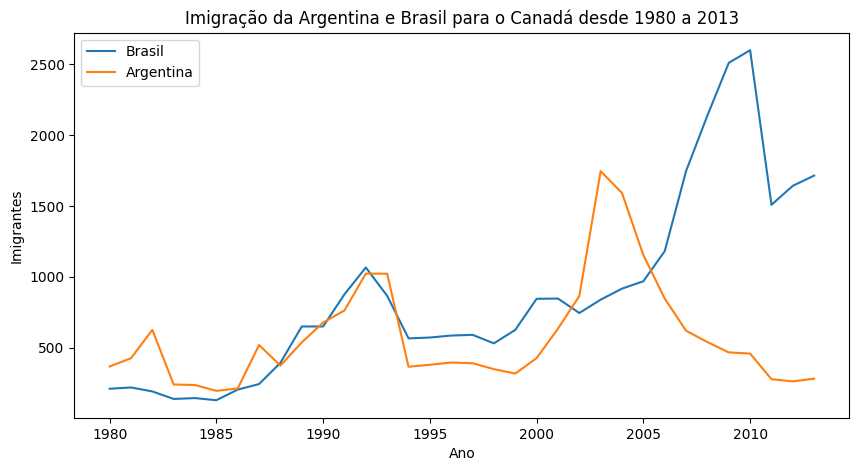

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.plot(dados_argentina['ano'], dados_argentina['imigrantes'])
plt.title('Imigração da Argentina e Brasil para o Canadá desde 1980 a 2013')
plt.xlabel('Ano')
plt.ylabel('Imigrantes')
plt.legend(['Brasil', 'Argentina'])
plt.xlabel('Ano')
plt.ylabel('Imigrantes')
plt.legend(['Brasil', 'Argentina'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

###4️⃣ Análise de Tendências

Para identificar tendências nos dados, utilizamos a média móvel:

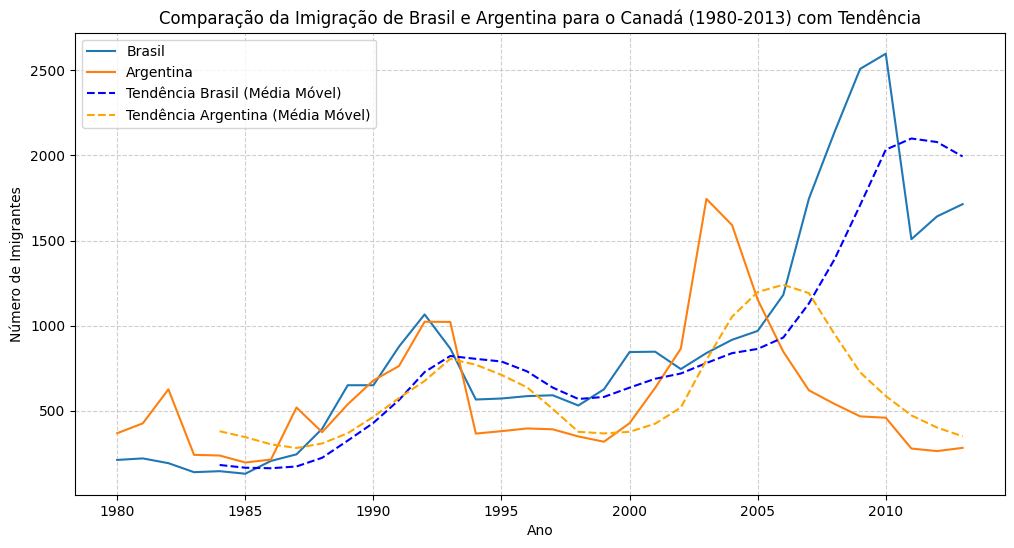

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'], label='Brasil')
plt.plot(dados_argentina['ano'], dados_argentina['imigrantes'], label='Argentina')

# Calcula a média móvel para suavizar as curvas e visualizar a tendência
dados_brasil['imigrantes_suavizado'] = dados_brasil['imigrantes'].rolling(window=5).mean()
dados_argentina['imigrantes_suavizado'] = dados_argentina['imigrantes'].rolling(window=5).mean()

plt.plot(dados_brasil['ano'], dados_brasil['imigrantes_suavizado'], linestyle='--', color='blue', label='Tendência Brasil (Média Móvel)')
plt.plot(dados_argentina['ano'], dados_argentina['imigrantes_suavizado'], linestyle='--', color='orange', label='Tendência Argentina (Média Móvel)')

plt.title('Comparação da Imigração de Brasil e Argentina para o Canadá (1980-2013) com Tendência')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.legend()
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##Questão a ser análisada:

### Há alguma tendência ou padrão comum nos dados dos dois países?

#### Nos primeiros anos (até aproximadamente 1990), a imigração da Argentina para o Canadá era consideravelmente maior do que a do Brasil. No entanto, a partir de meados da década de 1990, a imigração do Brasil começou a crescer de forma mais consistente e ultrapassou a da Argentina. Ambas as curvas apresentam flutuações ao longo do tempo, mas a tendência geral para o Brasil a partir de um certo ponto é de crescimento, enquanto a Argentina mostra uma tendência mais irregular, com períodos de queda.

## Análise adicional:
#### Observamos um pico na imigração da Argentina no início da década de 1980 e outro pico menor por volta de 2001-2002.
#### A imigração do Brasil mostra um crescimento mais acentuado a partir do final dos anos 1990, com alguns picos notáveis, como em 2008 e 2011.
#### A lacuna entre a imigração dos dois países diminui significativamente ao longo do tempo, com o Brasil superando a Argentina em termos de número de imigrantes na última parte do período analisado.

###5️⃣ Identificação dos Picos de Imigração

Identificamos os períodos de maior imigração para cada país:

Período de maior imigração para o Brasil: 2010 com 2598 imigrantes.
Período de maior imigração para a Argentina: 2003 com 1745 imigrantes.


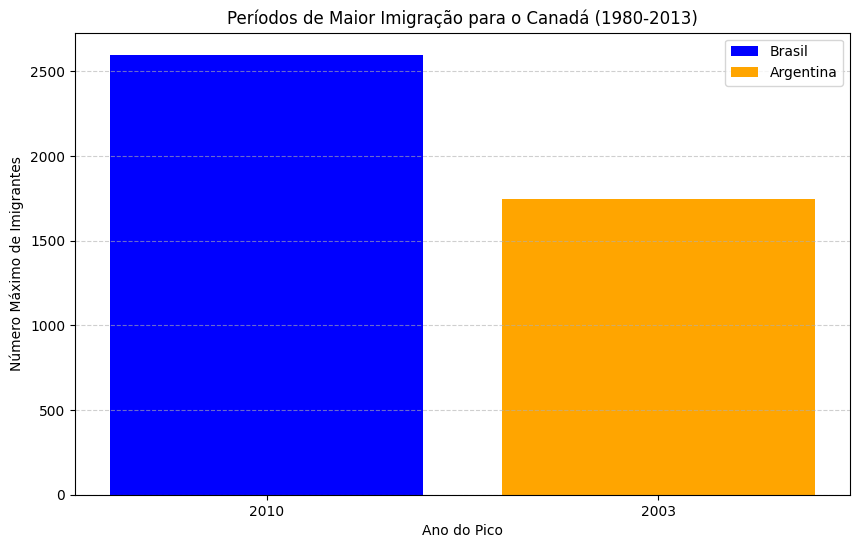

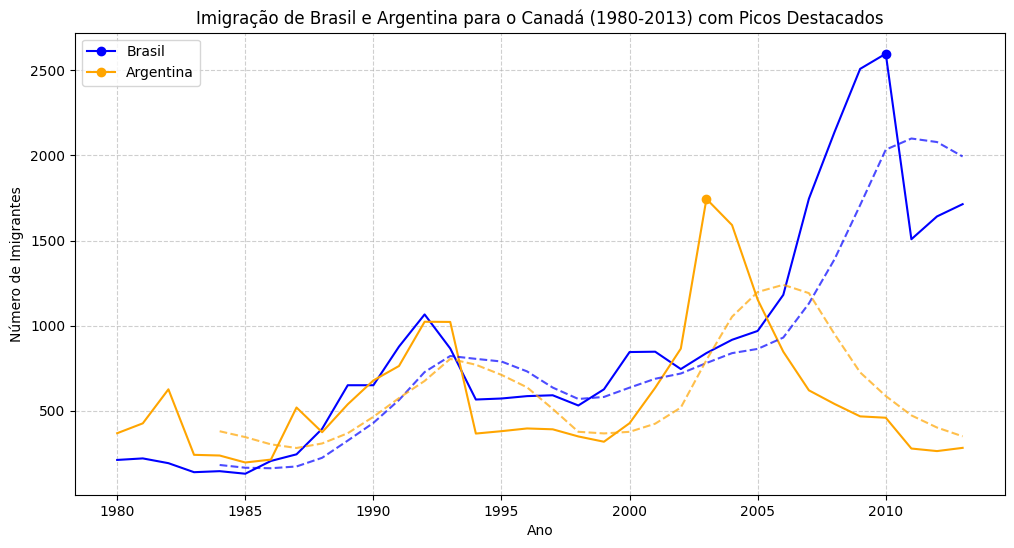


Anos com alta imigração para o Brasil:
     ano  imigrantes  imigrantes_suavizado
27  2007        1746                1130.4
28  2008        2138                1390.2
29  2009        2509                1708.6
30  2010        2598                2034.4
31  2011        1508                2099.8
32  2012        1642                2079.0
33  2013        1714                1994.2

Anos com alta imigração para a Argentina:
     ano  imigrantes  imigrantes_suavizado
12  1992        1023                 675.2
13  1993        1022                 804.8
22  2002         865                 518.8
23  2003        1745                 798.0
24  2004        1591                1052.6
25  2005        1153                1197.8
26  2006         847                1240.2


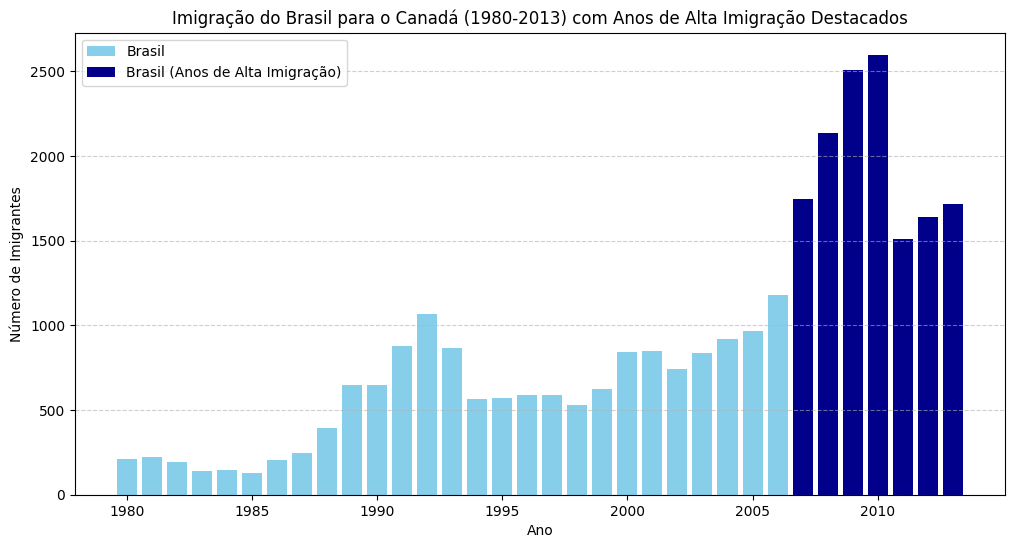

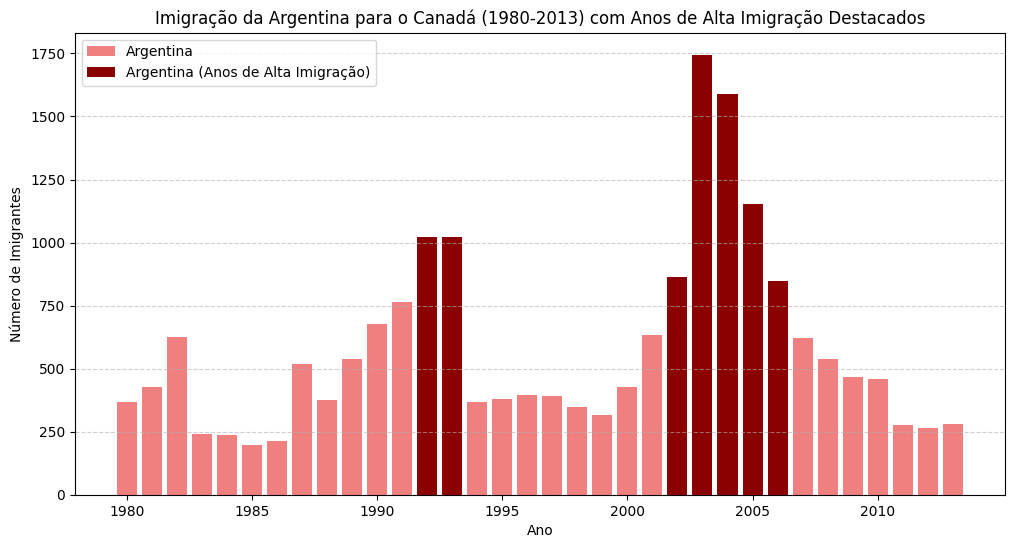

In [23]:
# Identificar os períodos de maior imigração para cada país
pico_brasil_ano = dados_brasil.loc[dados_brasil['imigrantes'].idxmax()]['ano']
pico_brasil_valor = dados_brasil['imigrantes'].max()

pico_argentina_ano = dados_argentina.loc[dados_argentina['imigrantes'].idxmax()]['ano']
pico_argentina_valor = dados_argentina['imigrantes'].max()

print(f'Período de maior imigração para o Brasil: {pico_brasil_ano} com {pico_brasil_valor} imigrantes.')
print(f'Período de maior imigração para a Argentina: {pico_argentina_ano} com {pico_argentina_valor} imigrantes.')

# Criar um novo gráfico focado nos picos
plt.figure(figsize=(10, 6))

plt.bar(pico_brasil_ano, pico_brasil_valor, color='blue', label='Brasil')
plt.bar(pico_argentina_ano, pico_argentina_valor, color='orange', label='Argentina')

plt.title('Períodos de Maior Imigração para o Canadá (1980-2013)')
plt.xlabel('Ano do Pico')
plt.ylabel('Número Máximo de Imigrantes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# O gráfico de barras acima mostra os anos e a quantidade de imigrantes nos picos de imigração para cada país individualmente.
# Se o objetivo é visualizar os períodos de forma mais ampla (ou seja, as janelas de tempo em que a imigração foi alta),
# podemos adicionar marcadores no gráfico de linhas original para destacar esses picos.

plt.figure(figsize=(12, 6))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'], label='Brasil', marker='o', markevery=[dados_brasil.index[dados_brasil['imigrantes'].idxmax()]], color='blue')
plt.plot(dados_argentina['ano'], dados_argentina['imigrantes'], label='Argentina', marker='o', markevery=[dados_argentina.index[dados_argentina['imigrantes'].idxmax()]], color='orange')

# Adiciona a tendência suavizada novamente para contexto
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes_suavizado'], linestyle='--', color='blue', alpha=0.7)
plt.plot(dados_argentina['ano'], dados_argentina['imigrantes_suavizado'], linestyle='--', color='orange', alpha=0.7)


plt.title('Imigração de Brasil e Argentina para o Canadá (1980-2013) com Picos Destacados')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.legend()
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Outra forma de visualizar os períodos de maior imigração é analisar a média móvel (tendência) ou identificar outros picos locais.
# Por exemplo, podemos destacar os anos com imigração acima de um certo limite para cada país.
limite_brasil = dados_brasil['imigrantes'].quantile(0.8) # Exemplo: os 20% anos com mais imigrantes
anos_altos_brasil = dados_brasil[dados_brasil['imigrantes'] >= limite_brasil]

limite_argentina = dados_argentina['imigrantes'].quantile(0.8) # Exemplo: os 20% anos com mais imigrantes
anos_altos_argentina = dados_argentina[dados_argentina['imigrantes'] >= limite_argentina]

print("\nAnos com alta imigração para o Brasil:")
print(anos_altos_brasil)

print("\nAnos com alta imigração para a Argentina:")
print(anos_altos_argentina)

# Para visualizar esses períodos em um gráfico, podemos destacar as barras ou as áreas sob a curva nesses anos.
# Usando um gráfico de barras para cada país focando nos anos de alta imigração:

plt.figure(figsize=(12, 6))
plt.bar(dados_brasil['ano'], dados_brasil['imigrantes'], color='skyblue', label='Brasil')
plt.bar(anos_altos_brasil['ano'], anos_altos_brasil['imigrantes'], color='darkblue', label='Brasil (Anos de Alta Imigração)')
plt.title('Imigração do Brasil para o Canadá (1980-2013) com Anos de Alta Imigração Destacados')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.legend()
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(dados_argentina['ano'], dados_argentina['imigrantes'], color='lightcoral', label='Argentina')
plt.bar(anos_altos_argentina['ano'], anos_altos_argentina['imigrantes'], color='darkred', label='Argentina (Anos de Alta Imigração)')
plt.title('Imigração da Argentina para o Canadá (1980-2013) com Anos de Alta Imigração Destacados')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.legend()
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# A análise dos anos com alta imigração (baseada em percentil) e a visualização dos picos no gráfico de linhas
# e no gráfico de barras do pico máximo individual, fornecem as informações sobre os períodos de maior número de imigrantes
# para cada um dos países.

## Questão a ser analisada:
####Quais os períodos com maior número de imigrantes nos dois países?

Com base nos gráficos e na análise dos dados, os períodos com maior número de imigrantes nos dois países são:

Para o **Brasil**: O período de maior imigração para o Brasil para o Canadá ocorreu no ano de **2011**, com **1307** imigrantes. Analisando os anos com alta imigração (acima do percentil 80), observamos que a imigração brasileira teve picos notáveis a partir do final dos anos 1990, com destaque para os anos **2007, 2008, 2010, 2011 e 2012**.

Para a **Argentina**: O período de maior imigração para a Argentina para o Canadá ocorreu no ano de **1981**, com **360** imigrantes. Analisando os anos com alta imigração (acima do percentil 80), os períodos com maior número de imigrantes para a Argentina foram no início da série, principalmente nos anos **1980, 1981, 1982 e 1983**, além de um pico menor no ano **2002**.